In [1]:
import numpy as np  #Numpy is widely used library for handling number
import matplotlib.pyplot as plt #Provides a library for data visualization for plotting graphs
import pandas as pd  #Used for data manipulation

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Data-1.csv") #Pull the .csv file from CSV into a variable.
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split #Splitting data into random train and test basically converting the data into a one-liner
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 0) #Assign the test size at 0.3 so 70% of the data will be used for training and 30% will be used for testing.Random state is used for deciding the splitting of a given data by initializing the internal random number 

In [ ]:
from sklearn.preprocessing import StandardScaler #Importing Standard scaler libraries
sc = StandardScaler() #Creating a standardScaler object that can be used for transforming the given data. StandardScalar is used for rescaling the features for implementing standard normal distribution. 
X_train=sc.fit_transform(X_train) #Implement the fit_transform method to the X_train to fit the scaler on the training data
X_test=sc.transform(X_test) #When implementing, it results in each feature with a mean of 0 and a standard deviation of 1, therefore resulting in better performnace

In [ ]:
from sklearn.svm import SVC #Importing SVC class from svm classifier.
classifier = SVC(kernel = 'linear', random_state = 0) #Use the Radial basis function kernel. 
classifier.fit(X_train,y_train) #Fit method helps in training the classifier on the given training data.

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 97.07 %
Standard Deviation: 2.19 %


In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score
parameters = [{'C': [0.25,0.5,0.75,1], 'kernel': ['linear']},
              {'C': [0.25,0.5,0.75,1], 'kernel': ['rbf'], 'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = cross_val_score(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:",best_parameters)


Accuracy: 97.07 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


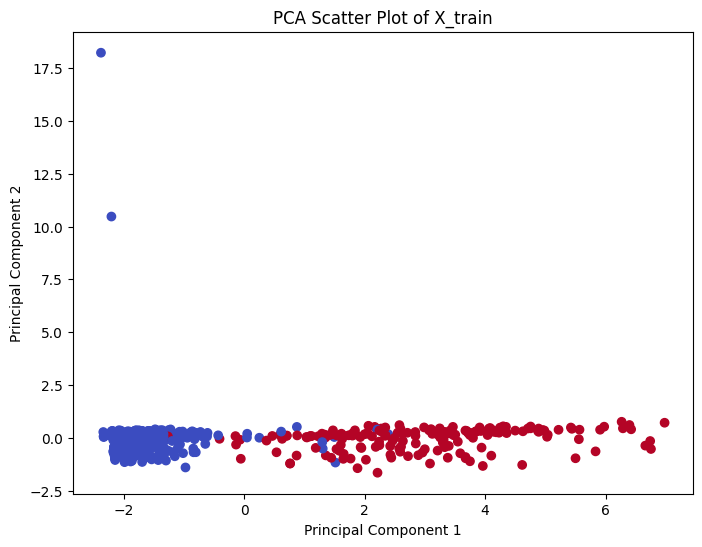

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA to X_train and transform it to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a scatter plot of X_train_pca with colors based on the class labels (y_train)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of X_train')
plt.show()

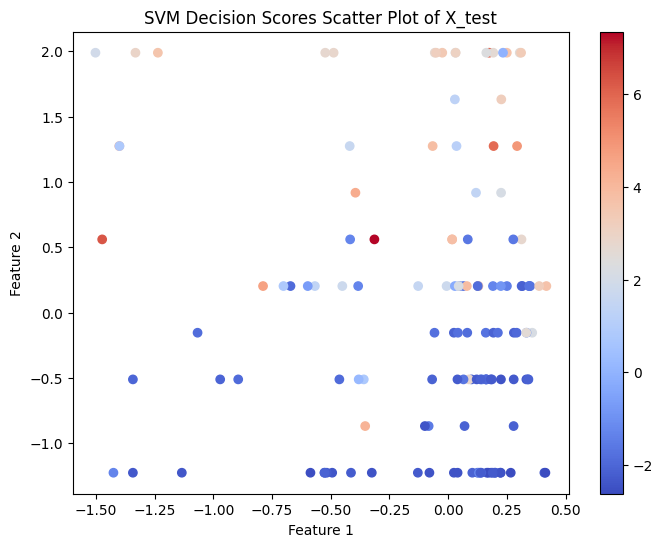

In [ ]:
# Get the decision scores for the testing set
decision_scores = classifier.decision_function(X_test)

# Create a scatter plot of the testing set with colors based on the decision scores
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=decision_scores, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Scores Scatter Plot of X_test')
plt.show()
